In [1]:
# Import the packages 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from glob import glob 

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Set the seed and create random number generator object
seed = 42
rng = np.random.RandomState(seed)

In [3]:
# Set the image path
path="./../../CV101/datasets/emergency_classification/images/"
imageName = "1.jpg";
myimage=path+imageName

### Load all the images i glob object and fetch an image randomly

In [4]:
data = pd.read_csv("./../../CV101/datasets/emergency_classification/emergency_classification.csv")

In [5]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [6]:
path="./../../CV101/datasets/emergency_classification/images/"
imageName = "1.jpg";

data['emergency_or_not'].value_counts()
y = data['emergency_or_not'].values

In [7]:
path="./../../CV101/datasets/emergency_classification/images/"
imageName = "1.jpg";


X = []
for img_name in data['image_names']:
    img = plt.imread(path + img_name)
    X.append(img)

In [8]:
X = np.array(X)
X.shape

(2352, 224, 224, 3)

In [9]:
X =  X.reshape(2352, 224 * 224 * 3)
X = X/X.max()

### Split the data

In [10]:
X_train ,X_test, y_train , y_test = train_test_split( X, y,test_size=0.3, random_state=seed)

### Create the Model

In [11]:
model = Sequential()

In [12]:
model.add(Dense(100, input_dim = 224 * 224 * 3, activation='sigmoid'))
model.add(Dense(units = 1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [15]:
model.fit(X_train,y_train,epochs=10,batch_size=120,validation_data=(X_train,y_train))

Train on 1646 samples, validate on 1646 samples
Epoch 1/10
1646/1646 [==============================] - 5s 3ms/step - loss: 0.8047 - acc: 0.5687 - val_loss: 0.6510 - val_acc: 0.6288
Epoch 2/10
1646/1646 [==============================] - 4s 3ms/step - loss: 0.6466 - acc: 0.6306 - val_loss: 0.6391 - val_acc: 0.6179
Epoch 3/10
1646/1646 [==============================] - 5s 3ms/step - loss: 0.6325 - acc: 0.6337 - val_loss: 0.6083 - val_acc: 0.6853
Epoch 4/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6256 - acc: 0.6652 - val_loss: 0.7236 - val_acc: 0.5869
Epoch 5/10
1646/1646 [==============================] - 5s 3ms/step - loss: 0.6210 - acc: 0.6659 - val_loss: 0.6461 - val_acc: 0.6221
Epoch 6/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6120 - acc: 0.6634 - val_loss: 0.5993 - val_acc: 0.6823
Epoch 7/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.5782 - acc: 0.7090 - val_loss: 0.6000 - val_acc: 0.6604
Epoch 8/10
164

In [ ]:
model.

### View the results of the sample data

21 % sure that it is emergency
Whereas actual class is  0


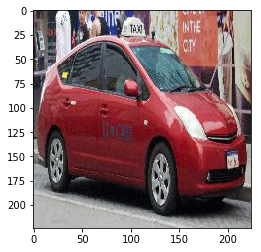

In [16]:
path="./../../CV101/datasets/emergency_classification/images/"

# get predictions
predictions = model.predict_classes(X_train)[:, 0]
prediction_probabilities = model.predict(X_train)[:, 0]

# pull out the original images from the data
# which correspond to the validation data
_, test_vehicles, _, test_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(test_vehicles)))

# get the corresponding image name and probability
img_name = test_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread(path + img_name)

# print probability and actual class
print(prob , '% sure that it is emergency')
print('Whereas actual class is ', test_y[index])

# plot image
plt.imshow(img)

## Train the mode by changing the hyper parameters

#### Model 2

In [18]:
model.add(Dense(100, input_dim = 224 * 224 * 3, activation='tanh'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=120,validation_data=(X_train,y_train))

Train on 1646 samples, validate on 1646 samples
Epoch 1/10
1646/1646 [==============================] - 5s 3ms/step - loss: 0.6827 - acc: 0.5863 - val_loss: 0.6880 - val_acc: 0.5863
Epoch 2/10
1646/1646 [==============================] - 5s 3ms/step - loss: 0.6832 - acc: 0.5863 - val_loss: 0.6784 - val_acc: 0.5863
Epoch 3/10
1646/1646 [==============================] - 5s 3ms/step - loss: 0.6817 - acc: 0.5863 - val_loss: 0.6785 - val_acc: 0.5863
Epoch 4/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6794 - acc: 0.5863 - val_loss: 0.6838 - val_acc: 0.5863
Epoch 5/10
1646/1646 [==============================] - 5s 3ms/step - loss: 0.6786 - acc: 0.5863 - val_loss: 0.6790 - val_acc: 0.5863
Epoch 6/10
1646/1646 [==============================] - 5s 3ms/step - loss: 0.6800 - acc: 0.5863 - val_loss: 0.6783 - val_acc: 0.5863
Epoch 7/10
1646/1646 [==============================] - 4s 3ms/step - loss: 0.6826 - acc: 0.5863 - val_loss: 0.6773 - val_acc: 0.5863
Epoch 8/10
164

### Model 2

In [19]:
model.add(Dense(100, input_dim = 224 * 224 * 3, activation='tanh'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=120,validation_data=(X_train,y_train))

Train on 1646 samples, validate on 1646 samples
Epoch 1/10
1646/1646 [==============================] - 6s 4ms/step - loss: 0.6883 - acc: 0.5595 - val_loss: 0.6814 - val_acc: 0.5863
Epoch 2/10
1646/1646 [==============================] - 6s 3ms/step - loss: 0.6809 - acc: 0.5863 - val_loss: 0.6782 - val_acc: 0.5863
Epoch 3/10
1646/1646 [==============================] - 6s 3ms/step - loss: 0.6793 - acc: 0.5863 - val_loss: 0.6788 - val_acc: 0.5863
Epoch 4/10
1646/1646 [==============================] - 6s 3ms/step - loss: 0.6801 - acc: 0.5863 - val_loss: 0.6843 - val_acc: 0.5863
Epoch 5/10
1646/1646 [==============================] - 5s 3ms/step - loss: 0.6931 - acc: 0.5377 - val_loss: 0.6953 - val_acc: 0.4137
Epoch 6/10
1646/1646 [==============================] - 6s 3ms/step - loss: 0.6819 - acc: 0.5790 - val_loss: 0.6785 - val_acc: 0.5863
Epoch 7/10
1646/1646 [==============================] - 6s 3ms/step - loss: 0.6803 - acc: 0.5863 - val_loss: 0.6847 - val_acc: 0.5863
Epoch 8/10
164

In [20]:
predictions = model.predict_classes(X_test)[:,0]

In [17]:
predictions==1
prediction_probabilities

array([0.19053374, 0.66440177, 0.5051997 , ..., 0.26375625, 0.5180918 ,
       0.2685223 ], dtype=float32)